Name: Rajesh Reddy

Student ID: 23287039

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#For pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn import set_config

In [3]:
#Read dataset
df = pd.read_csv('bank.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [5]:
 df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

The dataset has the following attributes: [ref](https://archive.ics.uci.edu/dataset/222/bank+marketing)

1.  age (numeric)
2.  job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.  marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
4.  education (categorical: "unknown","secondary","primary","tertiary")
5.  default: has credit in default? (binary: "yes","no")
6.  balance: average yearly balance, in euros (numeric)
7.  housing: has housing loan? (binary: "yes","no")
8.  loan: has personal loan? (binary: "yes","no")
9.  contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")
17. subscribed: has the client subscribed a term deposit?

In [6]:
#Save original data frame for referance
orig_df = df.copy()

In [7]:
#Seperate dependent and independent variables
y = df['subscribed']
X = df.drop(columns=['subscribed'])

In [8]:
#I am encoding the dependent column (Subscribed). Since there are only 2 values yes or no
#i will just use label encoder to encode the values
print(y)
y_encoder = LabelEncoder()
y= y_encoder.fit_transform(y)
print(y)

0        no
1        no
2        no
3        no
4        no
       ... 
1995    yes
1996    yes
1997    yes
1998    yes
1999    yes
Name: subscribed, Length: 2000, dtype: object
[0 0 0 ... 1 1 1]


In [9]:
train_X, test_X, train_y, text_y = train_test_split(X,y,test_size=0.2, random_state=100)

In [10]:
train_X.isnull().sum()

age           10
job            9
marital        0
education     82
default        0
balance        0
housing        0
loan           0
contact      161
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome     356
dtype: int64

In [11]:
train_X.describe()

age       balance          day     duration     campaign  \
count  1590.000000   1600.000000  1600.000000  1600.000000  1600.000000   
mean     41.490566   1432.511875    13.708125   292.660625     1.893750   
std      12.507100   3285.647083     9.613764   223.503569     1.358718   
min      19.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    197.000000     5.000000   144.000000     1.000000   
50%      38.000000    549.500000    12.000000   236.000000     1.000000   
75%      49.000000   1641.000000    22.000000   381.000000     2.000000   
max      93.000000  81204.000000    31.000000  1720.000000    11.000000   

             pdays     previous  
count  1600.000000  1600.000000  
mean    168.293125     2.576875  
std     131.508027     3.352031  
min      -1.000000     0.000000  
25%      82.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

# Task 1: Data Preparation Pipeline

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer #needed for data preparation

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

## Pipeline for nemurical features

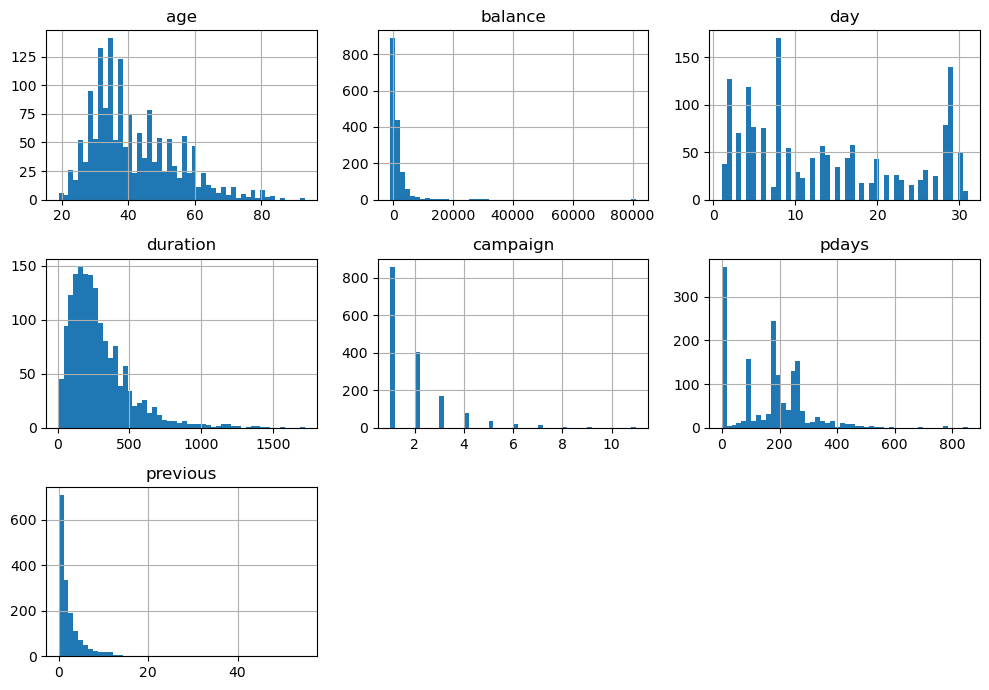

In [13]:
train_X.hist(bins=50, figsize=(10, 7))
plt.tight_layout()

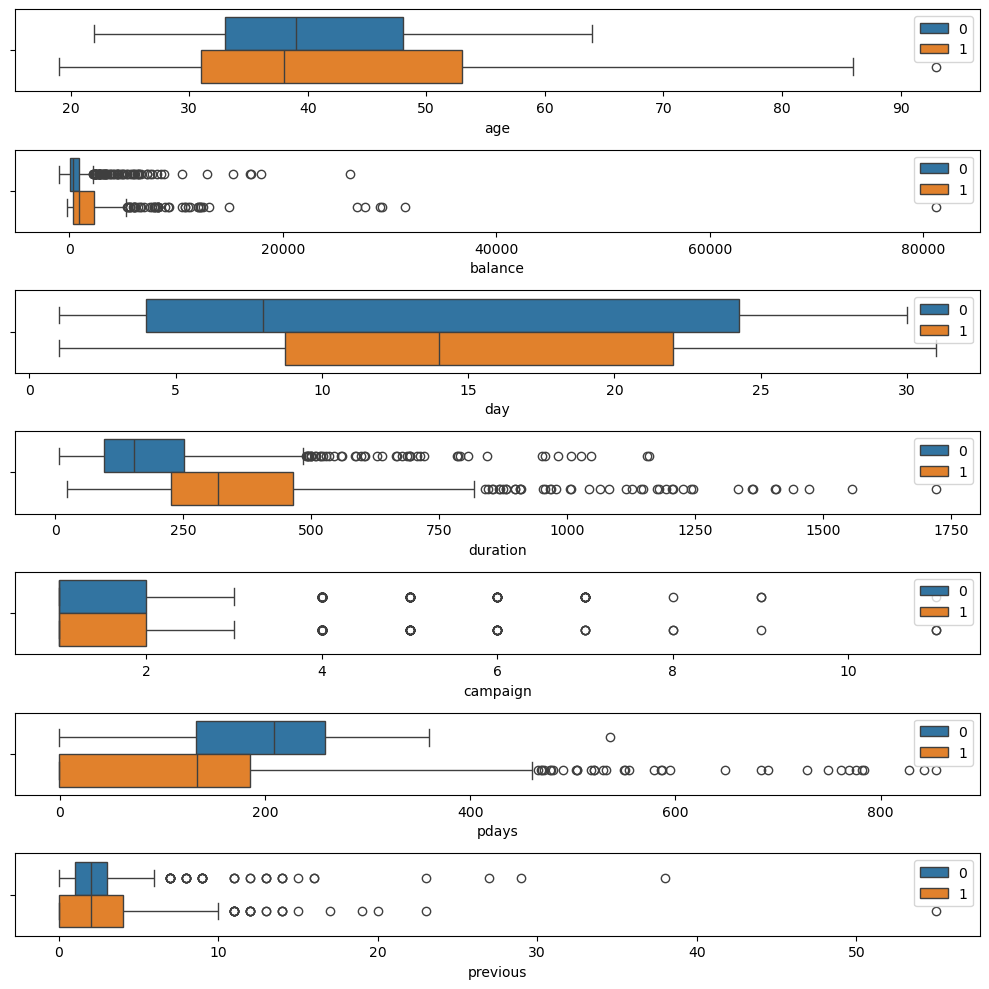

In [14]:
fig, axes = plt.subplots(7, 1, figsize=(10, 10) )

axes = axes.flatten()

for i, col in enumerate(train_X.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=train_X, x=col, hue = train_y, orient='h', ax=axes[i])

plt.tight_layout()
plt.show()

In [15]:
train_X['campaign'].value_counts()

campaign
1     858
2     403
3     171
4      81
5      39
6      23
7      16
9       3
8       3
11      3
Name: count, dtype: int64

**Age** - There are missing values, we need to impute the values. [SKlearn](https://scikit-learn.org/stable/modules/impute.html) has differnt imputers. I will start with simple imputer and then go with multivariate imputer in the pipeline. Once in impute the data i will convert it into categorical by age bins and then use ordinal encoder

**Balance** - Use Robust scaling and then clip the outliers  

**day** - Cyclical values, so encode using cyclical values

**Duration** - From the dataset descriptin it is very clear that duration column should not be used in the model

**Campaign** - Convert it to categorical and then one hot encode

**Pdays** - I am going to drop for now

**Previous** - I am going to drop for now





In [16]:
class OutlierQuartileClip(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        lower_whisker = np.percentile(X, 25, axis=0)
        higher_whisker = np.percentile(X, 75, axis=0)
        IQR = higher_whisker - lower_whisker
        self.lower_bound_ = lower_whisker - ( IQR * self.factor )
        self.upper_bound_ = higher_whisker + ( IQR * self.factor )
        #print(self.lower_bound_)
        #print(self.upper_bound_)
        return self

    def transform(self, X, y=None):
        X = np.clip(X, self.lower_bound_, self.upper_bound_)
        return X

In [17]:
class CyclicEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None):
        self.variables = variables
        
    def fit(self, X, y=None):
        self.max = np.max(X)
        #self.X_norm =  2 * np.pi * X / np.max(X)
        #print(np.max(X))
        return self

    def transform(self, X, y=None):
        X_norm =  2 * np.pi * X / self.max
        X_sin = np.sin(X_norm)
        X_cos = np.cos(X_norm)
        #print(X_sin.shape)
        #print(X_cos.shape)
        X = np.column_stack((X_sin, X_cos))
        #print(X_stack)
        return X

In [18]:
train_X_sample = train_X.sample(10)

In [19]:
oqc = OutlierQuartileClip()

In [20]:
oqc.fit_transform(train_X_sample['balance'])

59      7933.5
1696     265.0
1385    4112.0
592      893.0
284      941.0
1920     151.0
628     1025.0
964      487.0
353     1770.0
1666    4745.0
Name: balance, dtype: float64

In [21]:
cenc = CyclicEncoder()

In [22]:
cenc.fit(train_X_sample['day'])
cenc.fit_transform(train_X_sample['day'])

array([[-9.28976720e-01, -3.70138155e-01],
       [-7.62162055e-01,  6.47386285e-01],
       [-2.44929360e-16,  1.00000000e+00],
       [-2.44929360e-16,  1.00000000e+00],
       [ 7.62162055e-01,  6.47386285e-01],
       [ 9.86826523e-01, -1.61781997e-01],
       [-2.44929360e-16,  1.00000000e+00],
       [ 9.86826523e-01, -1.61781997e-01],
       [ 7.62162055e-01,  6.47386285e-01],
       [ 5.15553857e-01, -8.56857176e-01]])

In [23]:
age_feature = ['age']
age_transform = Pipeline( steps = [('imputer',SimpleImputer(strategy="median")),
                                     ('bins',KBinsDiscretizer( n_bins=10, encode='ordinal', strategy='quantile' ))
                                     #('bins',QuantileTransformer(n_quantiles=10))
                                    ])

In [24]:
balance_feature = ['balance']
balance_transform = Pipeline(steps = [('scaler', RobustScaler()),
                                      ('outliers', OutlierQuartileClip(1.5))
                                     ] )


In [25]:
day_feature = ['day']
day_transform = Pipeline( steps = [('cycle', CyclicEncoder())])

In [26]:
campaign_feature = ['campaign']
campaign_transform = Pipeline( steps = [('ordinal', OrdinalEncoder())])

In [27]:
numberic_preprocessor = ColumnTransformer( transformers=[('age',age_transform,age_feature),
                                                         ('balance',balance_transform,balance_feature),
                                                         ('day',day_transform, day_feature),
                                                         ('campaign', campaign_transform, campaign_feature)
                                                       ] )

In [28]:
#Run a test on sample dataset to check all transformations are working correctly
numberic_preprocessor.fit(train_X)
train_dataset_transformed = numberic_preprocessor.transform(train_X_sample)
train_dataset_transformed

array([[ 3.        ,  2.25588643, -0.79077574, -0.61210598,  0.        ],
       [ 1.        , -0.19702216, -0.93775213,  0.34730525,  0.        ],
       [ 9.        ,  2.25588643, -0.39435586,  0.91895781,  0.        ],
       [ 3.        ,  0.23788089, -0.39435586,  0.91895781,  0.        ],
       [ 9.        ,  0.27112188,  0.72479279,  0.68896692,  0.        ],
       [ 7.        , -0.27596953,  0.99871651, -0.05064917,  0.        ],
       [ 2.        ,  0.32929363, -0.39435586,  0.91895781,  0.        ],
       [ 3.        , -0.04328255,  0.99871651, -0.05064917,  1.        ],
       [ 2.        ,  0.84522161,  0.72479279,  0.68896692,  1.        ],
       [ 1.        ,  2.25588643,  0.65137248, -0.75875812,  0.        ]])

In [29]:
train_dataset_transformed.shape

(10, 5)

## Pipeline for categorical features

In [30]:
train_X.describe(include='object')

job  marital  education default housing  loan   contact month  \
count         1591     1600       1518    1600    1600  1600      1439  1600   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           354      880        796    1588     827  1393      1322   321   

       poutcome  
count      1244  
unique        3  
top     failure  
freq        755

**Job** - Impute missing values using most frequent and then do one hot encoding  \
**Martial** - use one hot encoding \
**Education** - Use ordinal ecnoding and impute missing values with -1 \
**default** - one hot Encoder \
**Housing** - one hot Encode \
**Loan** - one hot encoder \
**Month** - Transform month string to number and then cycle encode \
**Contant** - Drop column for now (This has no meanigful value) \
**Poutcome** - For now i am going to drop this colum. Depending on the model performance i will see if it needs to be included or now

In [31]:
train_X['job'].value_counts()

job
management       354
technician       279
blue-collar      244
admin.           205
services         129
retired          127
student           77
unemployed        58
self-employed     56
entrepreneur      37
housemaid         25
Name: count, dtype: int64

In [32]:
job_feature = ['job']
job_transform = Pipeline(steps = [('imputer',SimpleImputer(strategy="most_frequent",add_indicator=True)),
                                  ('onehotencode',OneHotEncoder(drop='first',sparse_output=False))
                                 ])

In [33]:
education_feature = ['education']
education_transform = Pipeline(steps = [('ordinal', OrdinalEncoder(categories=[['primary','secondary','tertiary']],
                                                                   handle_unknown='use_encoded_value',
                                                                   unknown_value=-1,
                                                                   encoded_missing_value=-1 )
                                        )])

In [34]:
onehot_ecoded_features = ['default','housing','loan','marital']
onehot_ecoded_transform = Pipeline( steps = [('onehotencode',OneHotEncoder(drop='first',sparse_output=False))])

In [35]:
month_feature = ['month']

month_transform = Pipeline(steps = [('ordinal', OrdinalEncoder(categories=[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']] )
                                        ),
                                    ('cycle', CyclicEncoder())
                                   ])

In [36]:
categorical_preprocessor = ColumnTransformer( transformers=[('job',job_transform,job_feature),
                                                            ('education',education_transform, education_feature),
                                                            ('onehotencode', onehot_ecoded_transform, onehot_ecoded_features),
                                                            ('month', month_transform, month_feature)
                                                            ] )

In [37]:
#Run a test on sample dataset to check all transformations are working correctly
categorical_preprocessor.fit(train_X)
endoced_values = categorical_preprocessor.transform(train_X_sample)
endoced_values.shape

(10, 19)

## Create processing pipeline

In [38]:
numeric_features = train_X.select_dtypes(include=[np.number]).columns
categorical_features = train_X.select_dtypes(include=[object]).columns
preprocessor = ColumnTransformer( transformers=[('numeric',numberic_preprocessor, numeric_features),
                                                ('categorical',categorical_preprocessor,categorical_features)
                                               ])

In [39]:
pre_proc = preprocessor.fit(train_X)

In [40]:
train_X_sample

age           job   marital  education default  balance housing loan  \
59    33.0   blue-collar    single  secondary      no    15341      no   no   
1696  30.0        admin.    single  secondary      no      265     yes   no   
1385  77.0       retired   married  secondary      no     4112      no   no   
592   33.0    management  divorced   tertiary      no      893     yes   no   
284   59.0       retired   married   tertiary      no      941      no  yes   
1920  51.0    management    single   tertiary      no      151     yes   no   
628   31.0      services    single   tertiary      no     1025      no   no   
964   34.0    management   married  secondary      no      487     yes   no   
353   32.0  entrepreneur    single    primary      no     1770      no  yes   
1666  28.0        admin.    single  secondary      no     4745      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  
59     cellular   20   apr       335         1    334         3  failure  
1696   cellular   25   may       681         1    181         2  success  
1385  telephone   29   jul       426         1    184         3  success  
592    cellular   29   jan       259         1    259         9  failure  
284    cellular    4   feb       231         1    210         1  failure  
1920   cellular    8   sep       638         1    427         3  success  
628    cellular   29   jan        93         1    254         3  failure  
964         NaN    8   may       442         2     -1         0      NaN  
353    cellular    4   feb       206         2    188         6  failure  
1666  telephone   12   may       360         1    181         5  success

In [41]:
transformed = pre_proc.transform(train_X_sample)

In [42]:
transformed[0:1]

array([[ 3.        ,  2.25588643, -0.79077574, -0.61210598,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.98982144, -0.14231484]])

In [43]:
pre_proc

ColumnTransformer(transformers=[('numeric',
                                 ColumnTransformer(transformers=[('age',
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('bins',
                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                    n_bins=10))]),
                                                                  ['age']),
                                                                 ('balance',
                                                                  Pipeline(steps=[('scaler',
                                                                                   RobustScaler()),
                                                                                  ('outliers',
                                                                                   OutlierQuartileClip())]),
                                                                  ['balance']),
                                                                 ('day',
                                                                  Pipeline(steps=[('cycle',
                                                                                   CyclicE...
                                                                                                 sparse_output=False))]),
                                                                  ['default',
                                                                   'housing',
                                                                   'loan',
                                                                   'marital']),
                                                                 ('month',
                                                                  Pipeline(steps=[('ordinal',
                                                                                   OrdinalEncoder(categories=[['jan',
                                                                                                               'feb',
                                                                                                               'mar',
                                                                                                               'apr',
                                                                                                               'may',
                                                                                                               'jun',
                                                                                                               'jul',
                                                                                                               'aug',
                                                                                                               'sep',
                                                                                                               'oct',
                                                                                                               'nov',
                                                                                                               'dec']])),
                                                                                  ('cycle',
                                                                                   CyclicEncoder())]),
                                                                  ['month'])]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'

# Task 2: k-Means
* Plot the sum of squared distances from the data points in the prepared bank dataset to the centers of the k-Means clusters for various values of k and use the Elbow method to pick the best value of k.
* Use the Silhouette Coefficient method to determine the best value of k as well.
* Use the best value(s) of k to cluster the prepared bank dataset with k-means. Aim at producing meaningful clustering.
* Use MDS and t-SNE for visualising the clusterings. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).


In [44]:
kmean_preprocessor = Pipeline(steps = [('feature_transform',pre_proc),
                                       #('pca', PCA(n_components=2, random_state=42)),
                                      ]
                             )

In [45]:
kmeans_pipe = kmean_preprocessor.fit(train_X)

In [46]:
transformed_data = kmean_preprocessor.transform(train_X)

In [47]:
transformed_data

array([[ 9.00000000e+00, -3.80540166e-01, -2.44929360e-16, ...,
         0.00000000e+00, -7.55749574e-01, -6.54860734e-01],
       [ 2.00000000e+00, -3.78462604e-01,  9.98716507e-01, ...,
         1.00000000e+00,  7.55749574e-01, -6.54860734e-01],
       [ 8.00000000e+00, -1.21537396e-01, -5.71268215e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 7.00000000e+00, -3.45914127e-01, -8.97804540e-01, ...,
         0.00000000e+00, -9.09631995e-01,  4.15415013e-01],
       [ 3.00000000e+00, -9.31440443e-02,  7.24792787e-01, ...,
         0.00000000e+00,  7.55749574e-01, -6.54860734e-01],
       [ 2.00000000e+00,  2.25588643e+00, -2.01298520e-01, ...,
         1.00000000e+00,  2.81732557e-01, -9.59492974e-01]])

In [48]:
kmeans_kwargs = { "init": "k-means++", "n_init": 10, "max_iter": 300,"random_state": 42 }

In [49]:
# Preprocessed dataset from previous Task 1
k_values = range(2, 20)

sse_list = []
silhouette_scores = []
ars_list = [] #adjusted rand score

# Perform k-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(transformed_data)
    
    # Calculate sum of squared distances (SSE)
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    # Calculate Silhouette Coefficient
    silhouette = silhouette_score(transformed_data, kmeans.labels_)
    silhouette_scores.append(silhouette)
    ars = adjusted_rand_score(train_y, kmeans.labels_)
    ars_list.append(ars)
    print(f'K = {k} | SSE = {sse:.4f} | Silhouette = {silhouette:.4f} | Adjusted rand score = {ars:.4f}')


K = 2 | SSE = 13552.6403 | Silhouette = 0.3401 | Adjusted rand score = 0.0014
K = 3 | SSE = 11829.3839 | Silhouette = 0.2011 | Adjusted rand score = 0.0072
K = 4 | SSE = 10654.1521 | Silhouette = 0.2133 | Adjusted rand score = 0.0061
K = 5 | SSE = 9844.1157 | Silhouette = 0.1583 | Adjusted rand score = 0.0362
K = 6 | SSE = 9333.6120 | Silhouette = 0.1618 | Adjusted rand score = 0.0337
K = 7 | SSE = 8972.2190 | Silhouette = 0.1345 | Adjusted rand score = 0.0469
K = 8 | SSE = 8702.5812 | Silhouette = 0.1292 | Adjusted rand score = 0.0711
K = 9 | SSE = 8490.0941 | Silhouette = 0.1237 | Adjusted rand score = 0.0698
K = 10 | SSE = 8279.6868 | Silhouette = 0.1201 | Adjusted rand score = 0.0777
K = 11 | SSE = 8082.3363 | Silhouette = 0.1172 | Adjusted rand score = 0.0602
K = 12 | SSE = 7902.9102 | Silhouette = 0.1157 | Adjusted rand score = 0.0577
K = 13 | SSE = 7757.9853 | Silhouette = 0.1034 | Adjusted rand score = 0.0563
K = 14 | SSE = 7588.0354 | Silhouette = 0.1039 | Adjusted rand score 

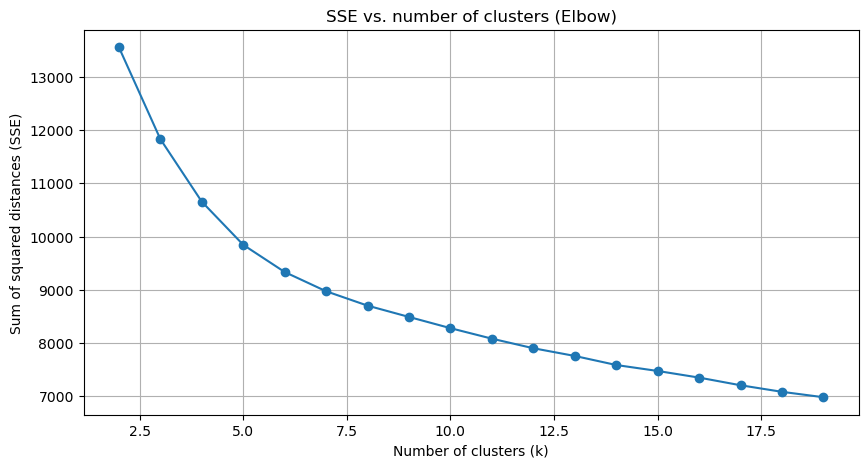

In [50]:
# Plot SSE vs. number of clusters (Elbow curve)
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse_list, marker='o')
plt.title('SSE vs. number of clusters (Elbow)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()

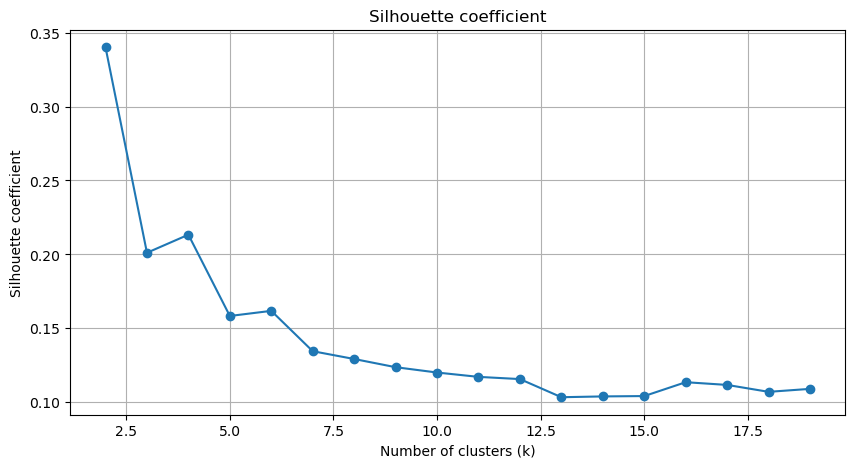

In [51]:
# Plot silhouette coefficient vs. number of clusters
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette coefficient')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True)
plt.show()

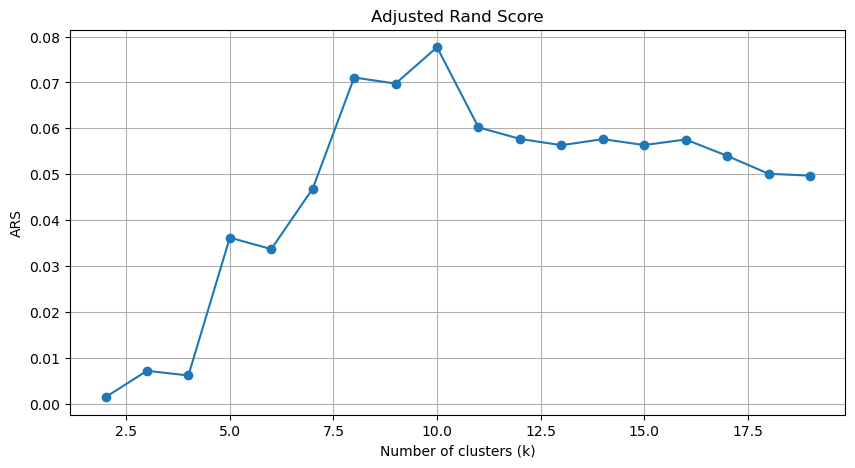

In [52]:
# Plot adjusted rand score vs. number of clusters
plt.figure(figsize=(10, 5))
plt.plot(k_values, ars_list, marker='o')
plt.title('Adjusted Rand Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('ARS')
plt.grid(True)
plt.show()

Best value for `k` according to **Silhouette** is 2

In [53]:
k = 2
silhouette_best_kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
silhouette_best_kmeans = silhouette_best_kmeans.fit(transformed_data)
predicted_classes = silhouette_best_kmeans.labels_
class_centers = silhouette_best_kmeans.cluster_centers_

### MDS and TSNE Visulization

In [54]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE

In [55]:
data_and_centers = np.r_[transformed_data,class_centers]

In [56]:
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)
print("transformation complete")

transformation complete


In [57]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [58]:

XYcoordinates[:-k,:].shape

(1600, 2)

In [59]:
XYcoordinates[-k:,:].shape

(2, 2)

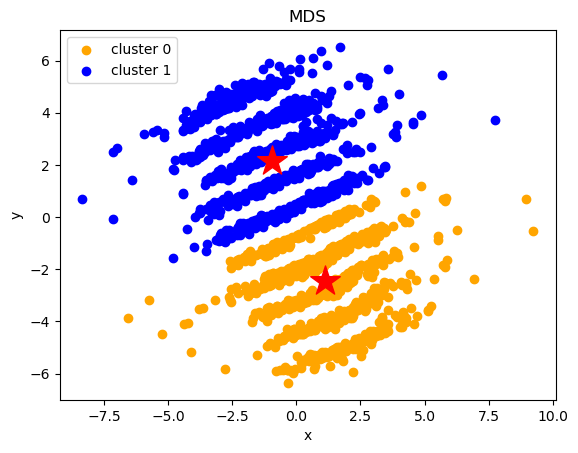

In [60]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=silhouette_best_kmeans.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [61]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


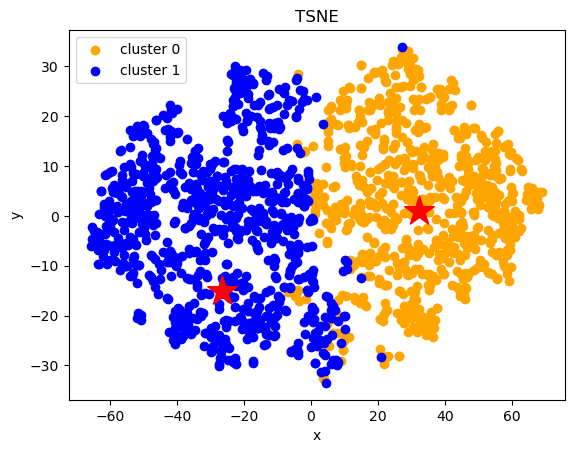

In [62]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=silhouette_best_kmeans.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

# Task 3: DBSCAN
In your notebook e-tivity2.ipynb:

* Apply the DBSCAN clustering algorithm to the prepared bank dataset.
* Use MDS and t-SNE for visualising the clustering. Write a short conclusion about the characteristics of the clusters and compare the performance of DBSCAN to k-Means. (max 250 words in a markdown cell).

In [63]:
DBSCAN_preprocessor = Pipeline(steps = [('feature_transform',pre_proc),
                                       #('pca', PCA(n_components=2, random_state=42)),
                                      ]
                             )

In [64]:
transformed_data = kmean_preprocessor.transform(train_X)
transformed_data.shape

(1600, 24)

In [65]:
min_samples = 24


In [66]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(transformed_data)
distances, indices = nbrs.kneighbors(transformed_data)

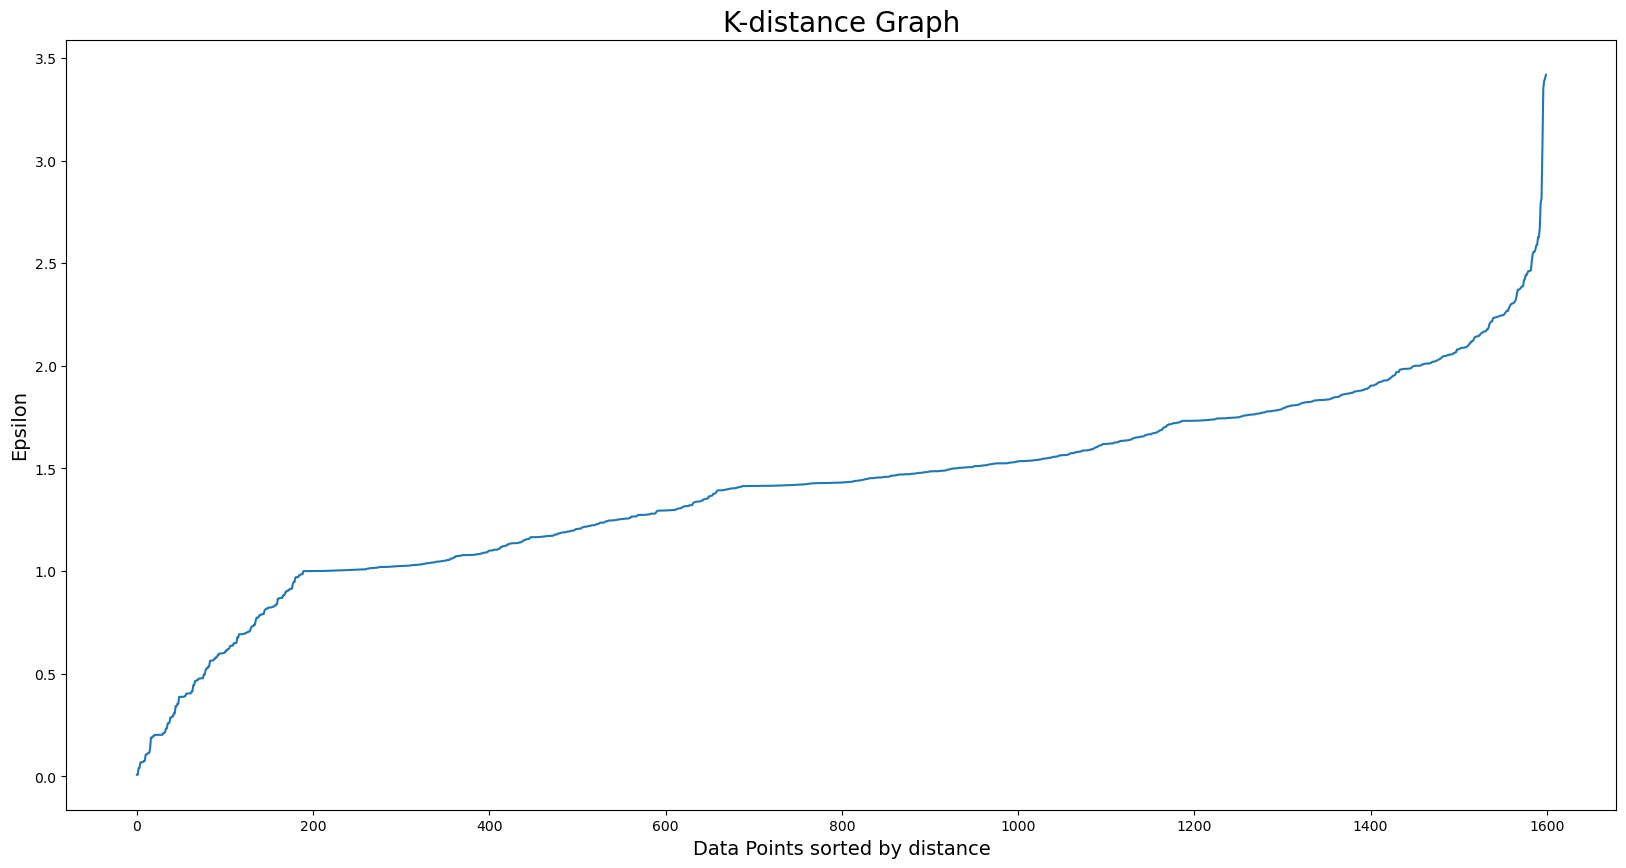

In [67]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

I will pick eps = 2 based on the above graph

In [68]:
dbscan = DBSCAN(eps=2.25, min_samples = min_samples)
#dbscan = DBSCAN(eps=0.5, min_samples = 5, )
dbscan = dbscan.fit(transformed_data)

In [69]:
dbscan.labels_

array([-1,  0,  0, ...,  0, -1, -1], dtype=int64)

In [70]:
silhouette_score(transformed_data, dbscan.labels_)

0.13386866110763043

In [71]:
print(dbscan.labels_)

[-1  0  0 ...  0 -1 -1]


### MDS and TSNE Visulization

In [72]:
mds = manifold.MDS(n_components=2, random_state=42)
mds_points = mds.fit_transform(transformed_data)

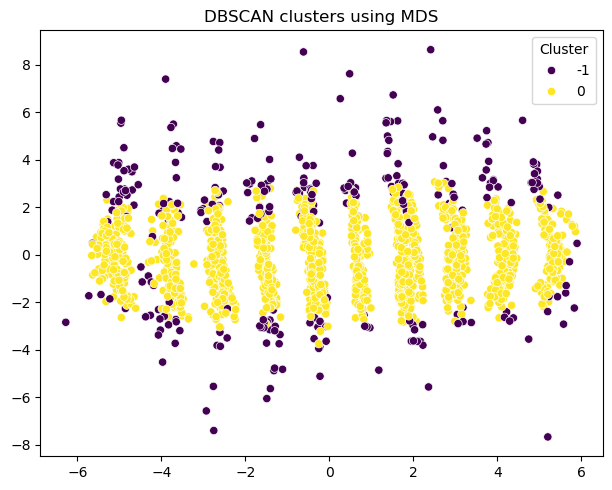

In [73]:
# Visualize MDS
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=mds_points[:, 0], y=mds_points[:, 1], hue=dbscan.labels_, palette='viridis')
plt.title('DBSCAN clusters using MDS')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


In [74]:
tsne = manifold.TSNE(n_components=2, random_state=42)
tsne_points = tsne.fit_transform(transformed_data)

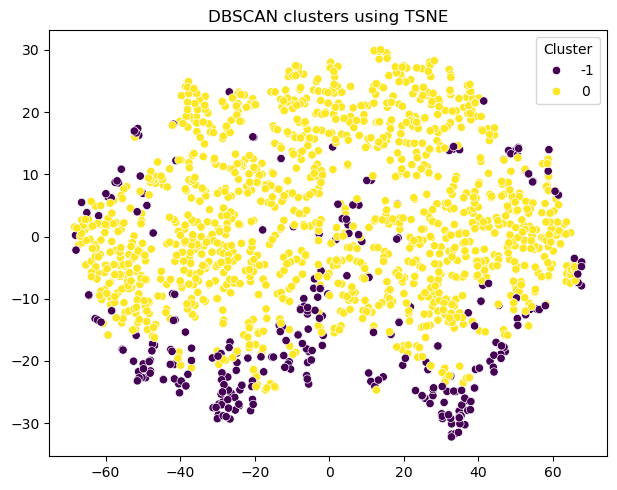

In [75]:
# Visualize TSNE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_points[:, 0], y=tsne_points[:, 1], hue=dbscan.labels_, palette='viridis')
plt.title('DBSCAN clusters using TSNE')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()